## Coding LLM Architecture

The architecture is less complicated than it seems because of repeated components. Lets break it down.

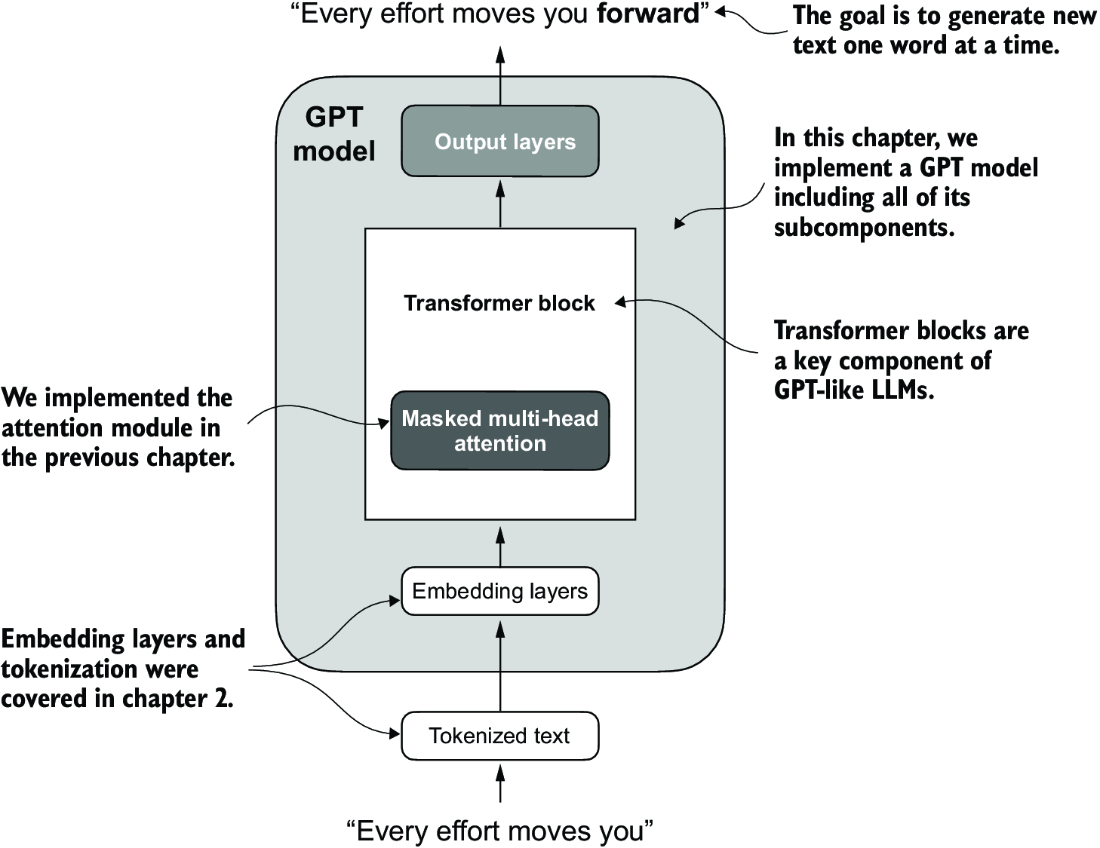

> GPT2 smallest version has 124 million parameters however there is 1.5 billion parameters version too. GPT3 is same as GPT2 in terms of architecture however it scaled upto 175 billion parameters.

**Configuration of GPT2 124M version**
```
GPT_CONFIG_124M = {  
    "vocab_size": 50257,     # Vocabulary size  
    "context_length": 1024,  # Context length   
    "emb_dim": 768,          # Embedding dimension   
    "n_heads": 12,           # Number of attention heads  
    "n_layers": 12,          # Number of layers  
    "drop_rate": 0.1,        # Dropout rate  
    "qkv_bias": False        # Query-Key-Value bias  
}
```

Let's implement GPT placeholders architecture 

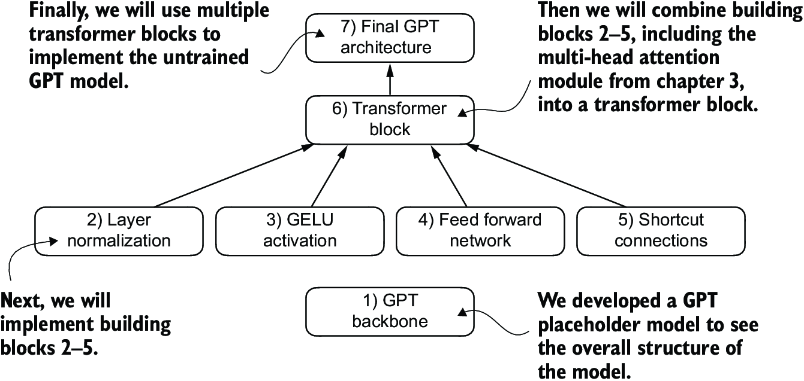

In [ ]:
import torch
import torch.nn as nn 

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(               #1
            *[DummyTransformerBlock(cfg)               #1
              for _ in range(cfg["n_layers"])]         #1
        )                                              #1
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])     #2
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):    #3
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):     #4
        return x

class DummyLayerNorm(nn.Module):           #5
    def __init__(self, normalized_shape, eps=1e-5):    #6
        super().__init__()

    def forward(self, x):
        return x